# Linear Model For Regression Analysis

Dataset: use boston dataset in sklearn toy dataset.  
Compare different linear model for regression.

## Import Module

In [166]:
# Import some useful module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
sns.set(style="white", color_codes=True)   

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import dataset and linear model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

## Import boston dataset
Use the boston dataset to run different regression models

In [3]:
boston = datasets.load_boston()

## View the data description

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Model Predictors

In [5]:
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.DataFrame(boston.data, columns=col)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Model Responce

In [8]:
df_R = pd.Series(boston.target)
df_R.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

## Cross-validation
### Seperate the data to training set and testing set for finding the best model

In [9]:
from sklearn.cross_validation import train_test_split

C:\Users\AdamChang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(df,df_R,random_state = 42)

## Training the different model and view the MSE

## Least Square Regression

First we try the least square model to predict the price.

In [11]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
predict1 = lr.predict(x_test)

print('Linear Regression Model:\n')
print('Coefficients:', lr.coef_)
print('MSE =', mean_squared_error(y_test, predict1))
print('R^2:',lr.score(x_test, y_test))

Linear Regression Model:

Coefficients: [ -1.27824912e-01   2.95208977e-02   4.92643105e-02   2.77594439e+00
  -1.62801962e+01   4.36089596e+00  -9.19111559e-03  -1.40172019e+00
   2.57458956e-01  -9.94705777e-03  -9.24266403e-01   1.33164215e-02
  -5.18565634e-01]
MSE = 22.1316778943
R^2: 0.683955724318


It looks not bad.  
Let's try the linear model with penalty.

## Try Ridge Regression

In [12]:
rg = linear_model.Ridge()
rg.fit(x_train, y_train)
predict2 = rg.predict(x_test)

print('Ridge Regression Model:\n')
print('Coefficients:', rg.coef_)
print('MSE =', mean_squared_error(y_test, predict2))
print('R^2:',rg.score(x_test, y_test))

Ridge Regression Model:

Coefficients: [-0.12317515  0.03135993  0.01800043  2.54498006 -8.79329845  4.37248993
 -0.01533593 -1.2913009   0.24364675 -0.01081661 -0.83432505  0.01361388
 -0.53530193]
MSE = 22.5123297109
R^2: 0.678519949035


## Try Lasso Regression

In [13]:
ls = linear_model.Lasso()
ls.fit(x_train, y_train)
predict3 = ls.predict(x_test)

print('Lasso Regression Model:\n')
print('Coefficients:', ls.coef_)
print('MSE =', mean_squared_error(y_test, predict3))
print('R^2:',ls.score(x_test, y_test))

Lasso Regression Model:

Coefficients: [-0.08446735  0.02647731 -0.          0.         -0.          1.5400203
  0.01347528 -0.58361292  0.20760129 -0.0112081  -0.7054379   0.01207364
 -0.75834494]
MSE = 24.4258144891
R^2: 0.651195047884


## Try ElasticNet Regression

In [14]:
en = linear_model.ElasticNet()
en.fit(x_train, y_train)
predict4 = en.predict(x_test)

print('ElasticNet Regression Model:\n')
print('Coefficients:', en.coef_)
print('MSE =', mean_squared_error(y_test, predict4))
print('R^2:',en.score(x_test, y_test))

ElasticNet Regression Model:

Coefficients: [-0.10322494  0.03413852 -0.00667195  0.         -0.          1.142079
  0.01442598 -0.70972042  0.26480823 -0.0134646  -0.74460471  0.0121163
 -0.78320085]
MSE = 24.1368243834
R^2: 0.65532187772


## First Conclusion:

If we use the default setting in all linear regression model, the relationship of MSE is:  
Linear < Ridge < ElasticNet < Lasso

The relationship of R^2 is:  
Linear > Ridge > ElasticNet > Lasso

In default setting, least square regression model have the best prediction performance of them. 

Let's try to adjust the penalty factor in each regressors.  
We use the GridSearch and CV = 5 to find the best parameter of the model.

### First one to try the ridge regression

In [24]:
param_grid_R = {'alpha':[0.001,0.01,0.1,1,10,100]}

In [25]:
from sklearn.model_selection import GridSearchCV
grid_search_R = GridSearchCV(linear_model.Ridge(), param_grid_R, cv=5)

In [26]:
grid_search_R.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
print('Best parameter of Ridge is:', grid_search_R.best_params_)
print('Best score of cv is:', grid_search_R.best_score_)

Best parameter of Ridge is: {'alpha': 0.001}
Best score of cv is: 0.715861092142


In [34]:
rg2 = linear_model.Ridge(alpha=0.001)
rg2.fit(x_train, y_train)
predictR2 = rg2.predict(x_test)

print('Ridge Regression Model:\n')
print('Coefficients:', rg2.coef_)
print('MSE =', mean_squared_error(y_test, predictR2))
print('R^2:',rg2.score(x_test, y_test))

Ridge Regression Model:

Coefficients: [ -1.27816057e-01   2.95241557e-02   4.92065901e-02   2.77559211e+00
  -1.62663722e+01   4.36095163e+00  -9.20278590e-03  -1.40151574e+00
   2.57431848e-01  -9.94860570e-03  -9.24097894e-01   1.33169759e-02
  -5.18593778e-01]
MSE = 22.1320961677
R^2: 0.6839497513


* MSE from 25.12 reduce to 22.13

## Second try the lasso regression

In [37]:
grid_search_L = GridSearchCV(linear_model.Lasso(),param_grid_R,cv=5)
grid_search_L.fit(x_train, y_train)
print('Best parameter of Lasso is:', grid_search_L.best_params_)
print('Best score of cv is:', grid_search_L.best_score_)

Best parameter of Lasso is: {'alpha': 0.001}
Best score of cv is: 0.715808620401


In [38]:
ls2 = linear_model.Lasso(alpha=0.001)
ls2.fit(x_train, y_train)
predictL3 = ls2.predict(x_test)

print('Lasso Regression Model:\n')
print('Coefficients:', ls2.coef_)
print('MSE =', mean_squared_error(y_test, predictL3))
print('R^2:',ls2.score(x_test, y_test))

Lasso Regression Model:

Coefficients: [ -1.27605187e-01   2.95927694e-02   4.78733082e-02   2.75575866e+00
  -1.59455993e+01   4.36033429e+00  -9.42852096e-03  -1.39637879e+00
   2.56822992e-01  -9.98439038e-03  -9.20271446e-01   1.33299746e-02
  -5.19439684e-01]
MSE = 22.1393106223
R^2: 0.683846727612


* MSE from 24.42 to 22.14

## Third try the ElasticNet

In [41]:
param_grid_E = {'alpha':[0.001,0.01,0.1,1,10,100],
               'l1_ratio':[x/100 for x in range(1,100,100)]}

In [42]:
grid_search_E = GridSearchCV(linear_model.ElasticNet(),param_grid_E,cv=5)
grid_search_E.fit(x_train, y_train)
print('Best parameter of ElasticNet is:', grid_search_E.best_params_)
print('Best score of cv is:', grid_search_E.best_score_)

Best parameter of ElasticNet is: {'alpha': 0.001, 'l1_ratio': 0.01}
Best score of cv is: 0.714902053532


In [43]:
en2 = linear_model.ElasticNet(alpha=0.001,l1_ratio=0.01)
en2.fit(x_train, y_train)
predictE4 = en2.predict(x_test)

print('ElasticNet Regression Model:\n')
print('Coefficients:', en2.coef_)
print('MSE =', mean_squared_error(y_test, predictE4))
print('R^2:',en2.score(x_test, y_test))

ElasticNet Regression Model:

Coefficients: [ -1.25329871e-01   3.04644749e-02   3.28104477e-02   2.66728799e+00
  -1.23393608e+01   4.37306916e+00  -1.24826316e-02  -1.34349767e+00
   2.49905319e-01  -1.03945847e-02  -8.76494445e-01   1.34739294e-02
  -5.26887598e-01]
MSE = 22.2946875038
R^2: 0.681627918256


* MSE from 24.13 to 22.29

# Second Conclusion

After adjust the factor to each model, the sort of MES in each model is:  
ElasticNet > Lasso > Ridge > Least Square  
It looks like the least square regression is the best model in this case.

Let's try the model stack strategy:

In [52]:
df_stack = pd.DataFrame({'Original':y_test,'LeastSquare':predict1,
                        'Ridge':predictR2,
                        'Lasso':predictL3,
                        'ElasticNet':predictE4})

In [55]:
df_stack['Mean'] = (df_stack['ElasticNet']+df_stack['Lasso']+
                      df_stack['LeastSquare']+df_stack['Ridge'])/4

In [57]:
df_stack.head()

,ElasticNet,Lasso,LeastSquare,Original,Ridge,Mean
173,28.683183,28.832164,28.844353,23.6,28.843780,28.800870
274,35.872231,35.992059,36.015286,32.4,36.014810,35.973596
491,14.743784,15.062241,15.090498,13.6,15.089289,14.996453
72,25.141674,25.231466,25.239394,22.8,25.239049,25.212896
452,19.040223,18.885542,18.870348,16.1,18.870943,18.916764


In [58]:
print('Stack MSE =', mean_squared_error(df_stack['Original'],df_stack['Mean']))

Stack MSE = 22.1658690264


# Third Conclusion

It looks like worse than Least Square Model.  
Let's try the subset selection strategy.  
I use the forward stepwise method to run the linear square regression to find the best combination of predictors.

In [62]:
df_R2 = pd.DataFrame(df_R)

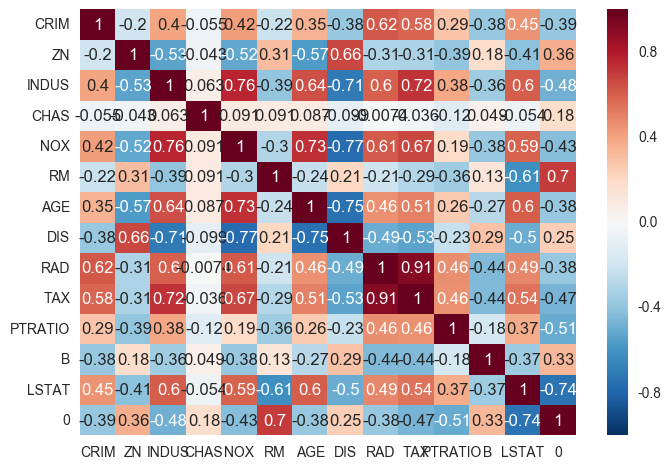

In [167]:
# Use heatmap to view the correlation
df_all = pd.concat([df,df_R2],axis=1)
sns.heatmap(df_all.corr(),annot=True)

In [85]:
# Sort the correlation to add the preditor one by one.
df_all_corr = df_all.corr()
corr = abs(df_all_corr[0]).sort_values(ascending=False)
corr = corr.drop(0)
corr

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: 0, dtype: float64

In [118]:
# Use the forward stepwise strategy to run the linear square regression.
forward_predictor = pd.DataFrame()
forward_responce = pd.DataFrame()
PredictorNum = []
MSE = []
for i in range(len(corr)):
    forward_predictor[corr.index[i]] = x_train[corr.index[i]]
    forward_responce[corr.index[i]] = x_test[corr.index[i]]
    lr.fit(forward_predictor,y_train)
    PredictorNum.append(len(forward_predictor.columns))
    MSE.append(mean_squared_error(y_test,lr.predict(forward_responce)))
mse = pd.DataFrame({'PredictorNum':PredictorNum,'MSE':MSE})

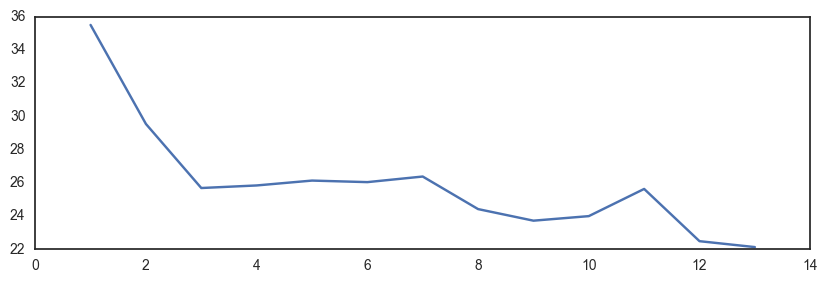

In [124]:
# View the MSE of each quantities of predictors.
plt.figure(figsize=(10,3))
plt.plot(mse['PredictorNum'],mse['MSE'])

# Fourth Conclusion

Least square regression model with full predictors is the best model in this case.

# Final Conclusion

Compare with the different model with adjust parameter:

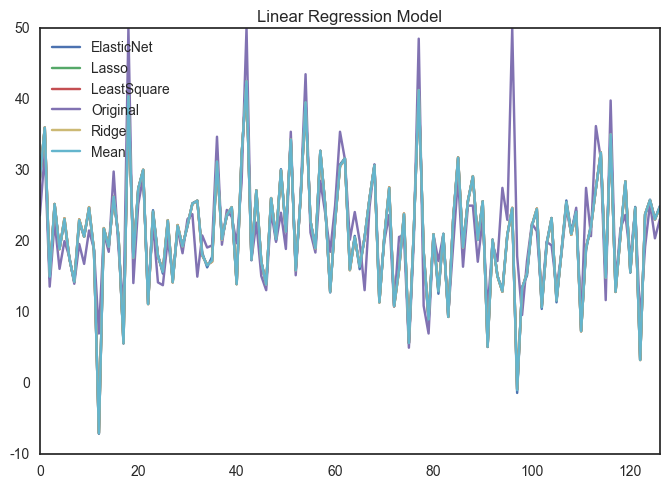

In [138]:
df_stack.reset_index().drop('index',1).plot()
plt.title('Linear Regression Model')

The prediction in 5 models are so closely.  
But compare the mean square error, least square is the best model in this case.

In [161]:
model_mse = pd.DataFrame([mean_squared_error(df_stack['Original'],df_stack['LeastSquare']),
                            mean_squared_error(df_stack['Original'],df_stack['Ridge']),
                            mean_squared_error(df_stack['Original'],df_stack['Lasso']),
                            mean_squared_error(df_stack['Original'],df_stack['ElasticNet']),
                           mean_squared_error(df_stack['Original'],df_stack['Mean'])],
                         index=['LeastSqure','Ridge','Lasso','ElasticNet','ElasticNet'],columns=['MSE'])

Visualize the MSE in different model.

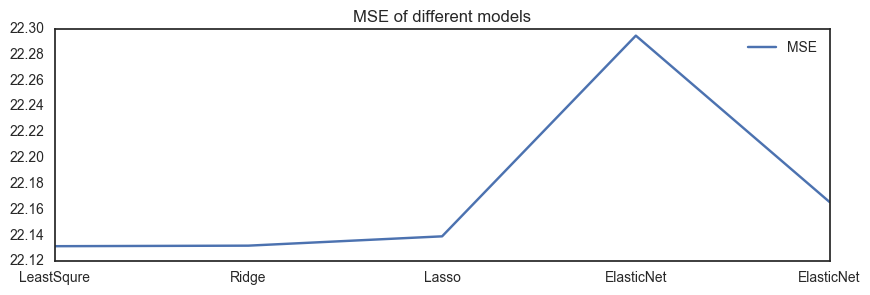

In [168]:
model_mse.plot(figsize=(10,3))
plt.title('MSE of different models')